In [1]:
import numpy as np
import pandas as pd
from plotly import graph_objects as go

In [2]:
from tests.utils import generate_price_series

# Generate synthetic price series

In [3]:
close_series = generate_price_series(10000, inter_arrival_time=15)

<Axes: >

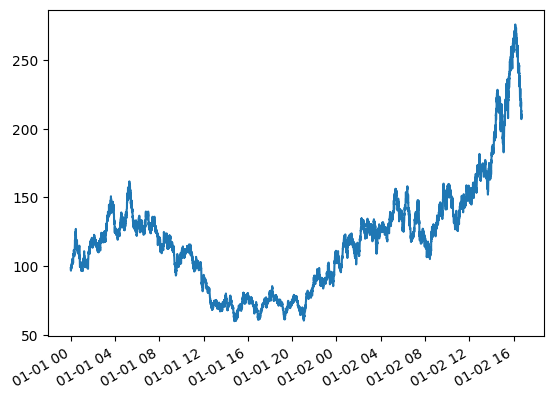

In [4]:
close_series.plot()

In [5]:
close_series.head(30)

1994-01-01 00:00:07.039021350     98.518226
1994-01-01 00:00:52.190842813     97.411055
1994-01-01 00:01:11.942028217     97.785656
1994-01-01 00:01:25.636166523     96.639655
1994-01-01 00:01:28.180539580     97.716019
1994-01-01 00:01:30.724483959     97.641666
1994-01-01 00:01:31.622065488     97.720391
1994-01-01 00:02:01.790528455     97.443870
1994-01-01 00:02:15.576760760     98.194971
1994-01-01 00:02:34.045511685     98.962065
1994-01-01 00:02:34.357501305     99.289234
1994-01-01 00:03:26.910863433     99.846602
1994-01-01 00:03:53.707306583     99.630081
1994-01-01 00:03:57.287620962    100.166737
1994-01-01 00:04:00.297805793     99.823876
1994-01-01 00:04:03.336977135     99.821112
1994-01-01 00:04:08.778283077     99.542359
1994-01-01 00:04:19.937200540     99.083317
1994-01-01 00:04:28.420256542     98.397949
1994-01-01 00:04:33.583601430     98.854282
1994-01-01 00:04:47.779164539    100.153391
1994-01-01 00:04:50.032682470    101.328118
1994-01-01 00:04:55.215415150   

# Compute volatility and plot

In [6]:
from finmlkit.indicators.volatility import standard_volatility_estimator

In [20]:
lookback = 60

In [21]:
vol_estimates = standard_volatility_estimator(close_series.index.astype(np.int64).values, close_series.values, return_window_sec=60., lookback=lookback)

In [22]:
def get_vol(close: pd.Series, lookback: int = 100,
            days: int = 0, hours: int = 0, minutes: int = 0, seconds: int = 0) -> pd.Series:

    time_delta = pd.Timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
    df0 = close.index.searchsorted(close.index - time_delta, side='right') - 1

    # Create a mask for valid indices
    valid_mask = df0 >= 0

    # Filter out invalid indices
    df0 = df0[valid_mask]

    # Align indices
    current_indices = np.arange(len(close))[valid_mask]
    lagged_indices = df0

    # Compute returns
    returns = pd.Series(np.nan, index=close.index)
    returns.iloc[current_indices] = close.iloc[current_indices].values / close.iloc[lagged_indices].values - 1

    returns = returns.ewm(span=lookback, adjust=True).std(bias=False)  # EWM standard deviation

    return returns

vol_estimates_pandas = get_vol(close_series, lookback=lookback, minutes=1)

In [23]:
from plotly.subplots import make_subplots

# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the close price trace
fig.add_trace(
    go.Scatter(x=close_series.index, y=close_series, mode='lines+markers', name='Close Price'),
    secondary_y=False
)

# Add the volatility trace
fig.add_trace(
    go.Scatter(x=close_series.index, y=vol_estimates, mode='lines', name='Volatility'),
    secondary_y=True
)

# Update the layout to add axis titles
fig.update_layout(
    title_text="Close Price and Volatility",
    xaxis_title="Time",
    yaxis_title="Close Price",
    yaxis2_title="Volatility"
)

# Show the figure
fig.show()

In [24]:
from plotly.subplots import make_subplots

# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the close price trace
fig.add_trace(
    go.Scatter(x=close_series.index, y=close_series, mode='lines+markers', name='Close Price'),
    secondary_y=False
)

# Add the volatility trace
fig.add_trace(
    go.Scatter(x=close_series.index, y=vol_estimates_pandas, mode='lines', name='Volatility'),
    secondary_y=True
)

# Update the layout to add axis titles
fig.update_layout(
    title_text="Close Price and Volatility",
    xaxis_title="Time",
    yaxis_title="Close Price",
    yaxis2_title="Volatility"
)

# Show the figure
fig.show()